In [ ]:
pip install folium
pip install geojson
pip install geopandas
pip install geojsonio

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objects as go
import os
import time
import scipy.stats as ss
import branca
import folium
import scipy.stats as stats

In [2]:
import time
import math
import geopy.distance

### 1. Importation et Exploration des données

In [3]:
data=pd.read_csv('annonces_immo.csv')
data

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Département

def get_departement(postal_code):
    if postal_code<9999:
        return int(str(postal_code)[:1])
    else:
        return int(str(postal_code)[:2])
    
    
data["departement"]=data.apply(
    lambda x: get_departement(x["postal_code"]),
    axis=1
)


data

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,departement
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,44
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,...,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77


### Import Gare

Sources des données

RATP : https://data.iledefrance-mobilites.fr/explore/dataset/emplacement-des-gares-idf/export/

SNCF : https://ressources.data.sncf.com/explore/dataset/referentiel-gares-voyageurs/table/?disjunctive.gare_ug_libelle&sort=gare_alias_libelle_noncontraint&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJ0cmVlbWFwIiwiZnVuYyI6IkNPVU5UIiwieUF4aXMiOiJuaXZlYXVzZXJ2aWNlX2xpYmVsbGUiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiZ2FyZV9yZWdpb25zbmNmX2xpYmVsbGUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiIiLCJzb3J0IjoiIiwic2VyaWVzQnJlYWtkb3duIjoiIiwic2VyaWVzQnJlYWtkb3duVGltZXNjYWxlIjoiIiwiY29uZmlnIjp7ImRhdGFzZXQiOiJyZWZlcmVudGllbC1nYXJlcy12b3lhZ2V1cnMiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLmdhcmVfdWdfbGliZWxsZSI6dHJ1ZSwic29ydCI6ImdhcmVfYWxpYXNfbGliZWxsZV9ub25jb250cmFpbnQifX19XSwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZSwidGltZXNjYWxlIjoiIn0%3D&fbclid=IwAR1JsF5cZvYJ5Y4j9ngMGF9I8eQqK4doy4aHgCc4ri9Jmadc_OtwKAWCQPA&location=5,46.8977,1.85189&basemap=jawg.transports


In [5]:
df_gare=pd.read_csv('referentiel-gares-voyageurs.csv',sep=';')
df_gare.columns

Index(['Code plate-forme', 'Code gare', 'Code UIC',
       'Date fin validité plateforme', 'Intitulé plateforme', 'Code postal',
       'Code Commune', 'Commune', 'Code département', 'Département',
       'Longitude', 'Latitude', 'Segment DRG', 'Niveau de service', 'RG',
       'TVSs', 'SOPs', 'Gare', 'Intitulé gare', 'Intitulé fronton de gare',
       'Gare DRG', 'Gare étrangère', 'DTG', 'Région SNCF', 'Unité gare', 'UT',
       'Nbre plateformes', 'TVS', 'WGS 84'],
      dtype='object')

In [6]:
print(df_gare[['Latitude','Longitude','WGS 84']].isnull().sum())

Latitude     11
Longitude    11
WGS 84       11
dtype: int64


In [7]:
#Suppression des 11 gares sans coordonnéées GPS
df_gare=df_gare[df_gare['WGS 84'].isnull()== False]

In [8]:
coords = (46.539758, 2.430331)
map_gare = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=6)

loc = "Gares ferroviaires SNCF"
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)  


map_gare.get_root().html.add_child(folium.Element(title_html))


for i in df_gare.index:
    folium.CircleMarker(
        location = (df_gare.loc[i,'Latitude'], df_gare.loc[i,'Longitude']),
        radius = int(1),
        fill = True
    ).add_to(map_gare)

map_gare

### Gares RATP : 

In [9]:
#RATP
gareratp=pd.read_csv('emplacement-des-gares-idf.csv',sep=';')
gareratp.columns

Index(['Geo Point', 'Geo Shape', 'gares_id', 'nom_long', 'nom', 'nom_sous',
       'nom_sur', 'id_ref_lda', 'nom_lda', 'id_ref_zdl', 'nom_zdl', 'num_mod',
       'mode_', 'fer', 'train', 'rer', 'metro', 'tramway', 'navette', 'val',
       'terfer', 'tertrain', 'terrer', 'termetro', 'tertram', 'ternavette',
       'terval', 'idrefliga', 'idrefligc', 'ligne', 'cod_ligf', 'ligne_code',
       'indice_lig', 'reseau', 'res_com', 'exploitant', 'num_psr', 'idf',
       'principal', 'x', 'y', 'picto ligne'],
      dtype='object')

In [10]:
gareratp[['Geo Point']]

,Geo Point
0,"48.8390897554,2.27045824379"
1,"48.5328901041,2.29008251383"
2,"48.6810166163,2.53313065657"
3,"48.7510232733,2.2158608601"
4,"48.5297469186,2.57207366138"
...,...
1166,"48.9517087836,2.32021652167"
1167,"48.7998873832,2.28195132017"
1168,"48.7807309692,2.23983201762"
1169,"48.9549290045,2.39095508616"


In [11]:
# Extraction des coordonnées géo de la feature Geo Point

def extract_coord(geostring : str):
    where=geostring.find(',')
    return[float(geostring[:where]),float(geostring[where+1:])]

gareratp["latitude"]=gareratp.apply(
    lambda x: extract_coord(x['Geo Point'])[0],
    axis=1
)

gareratp["longitude"]=gareratp.apply(
    lambda x: extract_coord(x['Geo Point'])[1],
    axis=1
)
gareratp

,Geo Point,Geo Shape,gares_id,nom_long,nom,nom_sous,nom_sur,id_ref_lda,nom_lda,id_ref_zdl,...,res_com,exploitant,num_psr,idf,principal,x,y,picto ligne,latitude,longitude
0,"48.8390897554,2.27045824379","{""coordinates"": [2.270458243787242, 48.8390897...",57,PONT DU GARIGLIANO - HOPITAL EUROPEEN GEORGES ...,Pont du Garigliano,Hôpital Européen Georges Pompidou,NaN,74002,Pont du Garigliano - Hôpital Européen Georges ...,58798,...,RER C,SNCF,393322,1,0,646453.5639,6.860141e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.839090,2.270458
1,"48.5328901041,2.29008251383","{""coordinates"": [2.290082513828219, 48.5328901...",101,BOURAY,Bouray,NaN,NaN,59830,Bouray,47905,...,RER C,SNCF,545178,1,0,647587.8337,6.826086e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.532890,2.290083
2,"48.6810166163,2.53313065657","{""coordinates"": [2.533130656571037, 48.6810166...",105,BOUSSY-SAINT-ANTOINE,Boussy-Saint-Antoine,NaN,NaN,62596,Boussy-Saint-Antoine,47924,...,RER D,SNCF,682138,1,0,665628.8216,6.842419e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.681017,2.533131
3,"48.7510232733,2.2158608601","{""coordinates"": [2.215860860098732, 48.7510232...",73,BIEVRES,Bièvres,NaN,NaN,63404,Bièvres,43091,...,RER C,SNCF,393546,1,0,642349.1491,6.850387e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.751023,2.215861
4,"48.5297469186,2.57207366138","{""coordinates"": [2.572073661381348, 48.5297469...",85,BOISSISE-LE-ROI,Boissise-le-Roi,NaN,NaN,61943,Boissise-le-Roi,45763,...,RER D,SNCF,682518,1,0,668404.6618,6.825587e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.529747,2.572074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,"48.9517087836,2.32021652167","{""coordinates"": [2.320216521669494, 48.9517087...",1190,LES BEATUS,Les Béatus,NaN,NaN,72372,Les Béatus,50566,...,TRAM 8,RATP,0,1,0,650213.4059,6.872631e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.951709,2.320217
1167,"48.7998873832,2.28195132017","{""coordinates"": [2.281951320169447, 48.7998873...",1163,PARC ANDRE MALRAUX,Parc André Malraux,NaN,NaN,70310,Parc André Malraux,59179,...,TRAM 6,RATP,0,1,0,647257.4640,6.855774e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.799887,2.281951
1168,"48.7807309692,2.23983201762","{""coordinates"": [2.23983201762499, 48.78073096...",1168,PAVE BLANC,Pavé Blanc,Parc Novéos,NaN,70049,Pavé Blanc,44300,...,TRAM 6,RATP,0,1,0,644143.2802,6.853673e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.780731,2.239832
1169,"48.9549290045,2.39095508616","{""coordinates"": [2.390955086162519, 48.9549290...",1205,GARE DE STAINS LA CERISAIE,Stains La Cerisaie,NaN,NaN,426083,Stains la Cerisaie,462931,...,TRAM 11,SNCF,0,1,0,655396.8739,6.872946e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,48.954929,2.390955


In [12]:
# Affichage du réseau Ile de France

import branca
import folium
coords = (48.839758, 2.310331)
map_ratp = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=10)

loc = "Gares ferroviaires RATP"
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)  


map_ratp.get_root().html.add_child(folium.Element(title_html))


for i in gareratp.index:
    folium.CircleMarker(
        location = (gareratp.loc[i,'latitude'], gareratp.loc[i,'longitude']),
        radius = int(1),
        fill = True,
    ).add_to(map_ratp)

map_ratp

In [13]:
# Concatenation des gares RATP + SNCF & Suppresion des doublons (gares servant à la fois aux deux entités)

df_gare[['Latitude','Longitude','WGS 84']]
df_gare2=df_gare[['Latitude','Longitude','WGS 84']]
gareratp2=gareratp[['latitude','longitude','Geo Point']]
df_gare2.columns=gareratp2.columns

#concatenation des DataFrame SNCF & RATP
df_train=pd.concat([df_gare2,gareratp2],ignore_index=True)
df_train.drop_duplicates(inplace=True) #Suppresion des gares en doublon en IDF
df_train

,latitude,longitude,Geo Point
0,42.441773,3.163403,"42.4417732,3.1634033"
1,42.458078,1.916726,"42.4580782,1.9167264"
2,42.457481,1.940482,"42.457481,1.9404821"
3,42.491232,2.038392,"42.4912317,2.0383917"
4,42.528801,2.249094,"42.5288009,2.249094"
...,...,...,...
4029,48.951709,2.320217,"48.9517087836,2.32021652167"
4030,48.799887,2.281951,"48.7998873832,2.28195132017"
4031,48.780731,2.239832,"48.7807309692,2.23983201762"
4032,48.954929,2.390955,"48.9549290045,2.39095508616"


## CALCUL DISTANCE :

* Comparaison des résultats (temps/erreur) entre distance Haversine  et fonction du package geopy.distance.geodesic.


In [14]:
import time
import math
import geopy.distance

def distance2(lat1,lon1,lat2,lon2):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    lat1 : float
        latitude of the original point
    lon1 : float
        longitude of the original point
    lat2 : float
        latitude of the point of destination
    lon2 : float
        longitude of the point of destination
    Returns
    -------
    distance_in_km : float
    """
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [18]:
# Exemple calcul de distance pour une annonce

start_time=time.time()
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
geopy.distance.geodesic(newport_ri, cleveland_oh).km


866.4554329098687

In [20]:
distance2(newport_ri[0],newport_ri[1],cleveland_oh[0],cleveland_oh[1])

864.2132735075523

In [22]:
data = data[['approximate_latitude', 'approximate_longitude']]
data.columns = ['latitude', 'longitude']
data

KeyError: "None of [Index(['approximate_latitude', 'approximate_longitude'], dtype='object')] are in the [columns]"

### Comparaison temps/erreur entre geodesic et distance2

In [49]:
def geodesic(df_orig,df_dest):
    res=pd.DataFrame(index=df_orig.index,columns=df_dest.index)
    res
    start=time.time()
    for i in res.index:
        coord1=(df_orig.loc[i,'latitude'],df_orig.loc[i,'longitude'])    
        for j in res.columns:
            coord2=(df_train.loc[j,'latitude'],df_train.loc[j,'longitude'])
            res.loc[i,j]=geopy.distance.geodesic(coord1,coord2).km

    _min=res.transpose().min()
    return [res,_min,time.time()-start]


def distance_homemade(df_orig,df_dest):
    res=pd.DataFrame(index=df_orig.index,columns=df_dest.index)
    res
    start=time.time()
    for i in res.index:
        #coord1=(df_orig.loc[i,'latitude'],df_orig.loc[i,'longitude']) 
        lat1=df_orig.loc[i,'latitude']
        long1=df_orig.loc[i,'longitude']
        for j in res.columns:
            #coord2=(df_train.loc[j,'latitude'],df_train.loc[j,'longitude'])
            lat2=df_train.loc[j,'latitude']
            long2=df_train.loc[j,'longitude']
            res.loc[i,j]=distance2(lat1,long1,lat2,long2)

    _min=res.transpose().min()
    return [res,_min,time.time()-start]

In [71]:
max_gare=df_train.shape[0]
df_dest=df_train[:max_gare]
time_d=[]
time_g=[]
error_l=[]
axis=np.logspace(2,7,7, base=2)
for i in axis:
    print("Nombre d'annonces :{}".format(int(i)))
    df_orig=data[:int(i)]
    res_dist=distance_homemade(df_orig,df_dest)
    res_geo=geodesic(df_orig,df_dest)
    time_d.append(res_dist[2])
    time_g.append(res_geo[2])
    error_l.append(mean_absolute_percentage_error(res_dist[1],res_geo[1])*100)

Nombre d'annonces :4
Nombre d'annonces :7
Nombre d'annonces :12
Nombre d'annonces :22
Nombre d'annonces :40
Nombre d'annonces :71
Nombre d'annonces :128


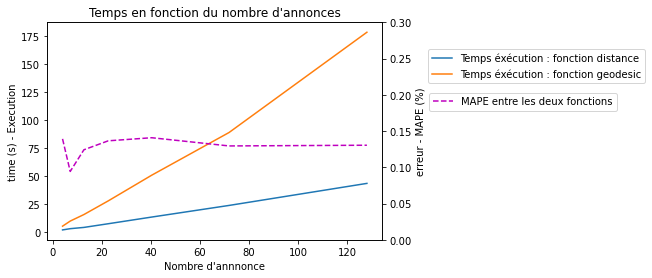

In [98]:
axis=np.logspace(2,7,7, base=2)

#plt.figure(figsize=(5,5))
fig, ax1=plt.subplots()
plt.plot(axis,time_d,label='Temps éxécution : fonction distance')
plt.plot(axis,time_g,label='Temps éxécution : fonction geodesic')
plt.ylabel('time (s) - Execution')
plt.xlabel("Nombre d'annnonce")
plt.title("Temps en fonction du nombre d'annonces")
plt.legend(bbox_to_anchor=(1.8, 0.9))
ax2=ax1.twinx()
plt.plot(axis,error_l,'m--',label='MAPE entre les deux fonctions')
plt.xlabel("Nombre d'annnonces")
plt.ylabel('erreur - MAPE (%)')
plt.ylim(0, 0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.715, 0.7))
plt.show()

###  Test KdTree :

**Objectif** :  Passer de O(n^2) à "O(log(n))".  (les arbres binomiaux sont notamment utilisés dans l'algorithme des plus  proches voisins)

**Idee  generale** :
Diviser le  jeu  de points des destinations  en deux  (prendre mediane de  la longitude ou longitude). puis pour  chacun des groupes calculer le centroide. Calcul de la distance entre point d'origine et les deux centroide. Le plus proche l'emporte et on supprime le groupe de l'autre. On redivise (alternance  entre longitude  et  latitude) puis on continue arret lorsqu'il ne reste que un seul point.

**Remarque** : le point le plus proche peut se trouver dans l'autre groupe  si le point d'origine se situe proche du plan de séparation. Erreur fortement possible. Ajout d'un critère de séparation du plan  (longitude/latitude)  en fonction de la distance du point d'origine à ces deux plans.  On garde  le plan  qui est le plus loin de  l'origine

**PLAN**:
* Test  avec attribution du  point d'origine au groupe dont il est le plus proche  du  centroide
* Test avec attribution au groupe  dans  lequel il  appartient réellement (plus logique)
* Ajout  d'un  critère  selon  lequel on recalcule l'ensemble  des distances  restantes. Avantage  de réduire les erreurs commises tout en profitant  de l'étape préliminaire d'élimination de points  de destinations lointains.

Source : explications basiques  & representation graphiques

https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940

In [217]:
def KdTree(ann_latitude,ann_longitude,df_dest,plus_proche=1):
    if df_dest.shape[0]<=plus_proche: #possible qu'en divisant par 2 on en ait moins
        if  plus_proche==1 :
            dest_latitude=df_dest['latitude'].values[0]
            dest_longitude=df_dest['longitude'].values[0]
            return distance2(ann_latitude,ann_longitude,dest_latitude,dest_longitude)
        else:
            l=[]
            for i in df_dest.index:
                l.append(distance2(ann_latitude,ann_longitude,\
                                  df_dest.loc[i,'latitude'],df_dest.loc[i,'longitude']))
            return l
                         
    med_latitude=df_dest.median()['latitude']
    med_longitude=df_dest.median()['longitude']

    #On calcule  la distance de l'annonce aux séparations longitude & latitude
    d_lat=distance2(ann_latitude,ann_longitude,med_latitude,ann_longitude)
    d_long=distance2(ann_latitude,ann_longitude,ann_latitude,med_longitude)

    #On sépare avec le plan le plus  loin
    if  d_lat>d_long: 
        df_g1=df_dest[df_dest['latitude']>med_latitude]
        df_g2=df_dest[df_dest['latitude']<=med_latitude]
        d_g1=distance2(ann_latitude,ann_longitude,df_g1.mean()['latitude'],df_g1.mean()['longitude'])
        d_g2=distance2(ann_latitude,ann_longitude,df_g2.mean()['latitude'],df_g2.mean()['longitude'])
        if d_g1<d_g2:
            return  KdTree(ann_latitude,ann_longitude,df_g1,plus_proche)
        else:
            return  KdTree(ann_latitude,ann_longitude,df_g2,plus_proche)
    else:
        df_g1=df_dest[df_dest['longitude']>med_longitude]
        df_g2=df_dest[df_dest['longitude']<=med_longitude]
        d_g1=distance2(ann_latitude,ann_longitude,df_g1.mean()['latitude'],df_g1.mean()['longitude'])
        d_g2=distance2(ann_latitude,ann_longitude,df_g2.mean()['latitude'],df_g2.mean()['longitude'])
        if d_g1<d_g2:
            return  KdTree(ann_latitude,ann_longitude,df_g1,plus_proche)
        else:
            return  KdTree(ann_latitude,ann_longitude,df_g2,plus_proche)

In [218]:
def distance_KDTree(df_orig,df_dest,plus_proche=1):
    res=pd.DataFrame(index=df_orig.index,columns=range(plus_proche))
    start=time.time()
    for i in res.index:
        #coord1=(df_orig.loc[i,'latitude'],df_orig.loc[i,'longitude']) 
        ann_latitude=df_orig.loc[i,'latitude']
        ann_longitude=df_orig.loc[i,'longitude']
        res.loc[i,:]=KdTree(ann_latitude,ann_longitude,df_dest,plus_proche=1)
    return [res,time.time()-start]

In [219]:
res=distance_KDTree(data[:10],df_train)

In [220]:
res[0]

,0
0,2.06221
1,11.9038
2,13.9517
3,24.9967
4,2.05464
5,17.577
6,2.191
7,4.7904
8,13.2318
9,11.7667


In [221]:
max_gare=df_train.shape[0]
df_dest=df_train[:max_gare]
time_d=[]
time_g=[]
error_l=[]
axis=np.logspace(3,6,4, base=2)
for i in axis:
    print("Nombre d'annonces :{}".format(int(i)))
    df_orig=data[:int(i)]
    res_dist=distance_homemade(df_orig,df_dest)
    res_KDT=distance_KDTree(df_orig,df_dest)
    time_d.append(res_dist[2])
    time_g.append(res_KDT[1])
    error_l.append(mean_absolute_percentage_error(res_dist[1],res_KDT[0])*100)

Nombre d'annonces :8
Nombre d'annonces :16
Nombre d'annonces :32
Nombre d'annonces :64


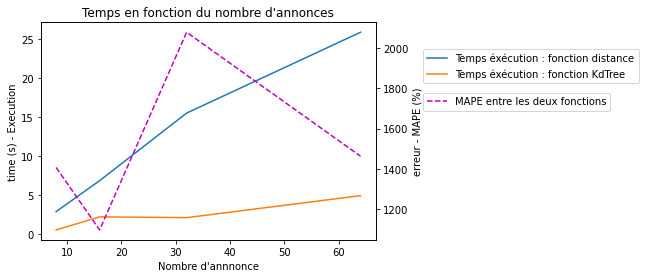

In [223]:
axis=np.logspace(3,6,4, base=2)

#plt.figure(figsize=(5,5))
fig, ax1=plt.subplots()
plt.plot(axis,time_d,label='Temps éxécution : fonction distance')
plt.plot(axis,time_g,label='Temps éxécution : fonction KdTree')
plt.ylabel('time (s) - Execution')
plt.xlabel("Nombre d'annnonce")
plt.title("Temps en fonction du nombre d'annonces")
plt.legend(bbox_to_anchor=(1.8, 0.9))
ax2=ax1.twinx()
plt.plot(axis,error_l,'m--',label='MAPE entre les deux fonctions')
plt.xlabel("Nombre d'annnonces")
plt.ylabel('erreur - MAPE (%)')
#plt.ylim(0, 0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.715, 0.7))
plt.show()

In [210]:
#  Gain de temps mais très erreurs trop importantes

In [227]:
print(res_dist[1])
print(res_KDT)

0      2.062215
1      1.235074
2     13.951685
3      2.813301
4      1.602086
        ...    
59     0.879617
60     1.749425
61     0.351169
62     1.531235
63     2.474854
Length: 64, dtype: float64
[           0
0    2.06221
1    11.9038
2    13.9517
3    24.9967
4    2.05464
..       ...
59  0.879617
60   14.4853
61  0.351169
62   16.1036
63   25.3146

[64 rows x 1 columns], 4.910238981246948]


### Erreur :
Peut etre du à un mix  entre KdTree  et BallTree. On ressaie  sans regarder si  notre  point  d'origine est
plus proche du  centroîde des  deux  espaces.  Essayons en nous contentons de voir dans lequel il est.

In [233]:
def KdTree(ann_latitude,ann_longitude,df_dest,plus_proche=1):
    if df_dest.shape[0]<=plus_proche: #possible qu'en divisant par 2 on en ait moins
        if  plus_proche==1 :
            dest_latitude=df_dest['latitude'].values[0]
            dest_longitude=df_dest['longitude'].values[0]
            return distance2(ann_latitude,ann_longitude,dest_latitude,dest_longitude)
        else:
            l=[]
            for i in df_dest.index:
                l.append(distance2(ann_latitude,ann_longitude,\
                                  df_dest.loc[i,'latitude'],df_dest.loc[i,'longitude']))
            return l
                         
    med_latitude=df_dest.median()['latitude']
    med_longitude=df_dest.median()['longitude']

    #On calcule  la distance de l'annonce aux séparations longitude & latitude
    d_lat=distance2(ann_latitude,ann_longitude,med_latitude,ann_longitude)
    d_long=distance2(ann_latitude,ann_longitude,ann_latitude,med_longitude)

    #On sépare avec le plan le plus  loin (en fonctiond de  la  hauteur)
    if  d_lat>d_long: #Separation  latitude
        df_g1=df_dest[df_dest['latitude']>med_latitude]
        df_g2=df_dest[df_dest['latitude']<=med_latitude]
#        d_g1=distance2(ann_latitude,ann_longitude,df_g1.mean()['latitude'],df_g1.mean()['longitude'])
#        d_g2=distance2(ann_latitude,ann_longitude,df_g2.mean()['latitude'],df_g2.mean()['longitude'])
        
        if ann_latitude>med_latitude:
            return  KdTree(ann_latitude,ann_longitude,df_g1,plus_proche)
        else:
            return  KdTree(ann_latitude,ann_longitude,df_g2,plus_proche)
    else: #Separation  longitude
        df_g1=df_dest[df_dest['longitude']>med_longitude]
        df_g2=df_dest[df_dest['longitude']<=med_longitude]
        #d_g1=distance2(ann_latitude,ann_longitude,df_g1.mean()['latitude'],df_g1.mean()['longitude'])
        #d_g2=distance2(ann_latitude,ann_longitude,df_g2.mean()['latitude'],df_g2.mean()['longitude'])
        if ann_longitude>med_longitude:
            return  KdTree(ann_latitude,ann_longitude,df_g1,plus_proche)
        else:
            return  KdTree(ann_latitude,ann_longitude,df_g2,plus_proche)
        
def distance_KDTree(df_orig,df_dest,plus_proche=1):
    res=pd.DataFrame(index=df_orig.index,columns=range(plus_proche))
    start=time.time()
    for i in res.index:
        #coord1=(df_orig.loc[i,'latitude'],df_orig.loc[i,'longitude']) 
        ann_latitude=df_orig.loc[i,'latitude']
        ann_longitude=df_orig.loc[i,'longitude']
        res.loc[i,:]=KdTree(ann_latitude,ann_longitude,df_dest,plus_proche=1)
    return [res,time.time()-start]

In [234]:
res=distance_KDTree(data[:10],df_train)

In [235]:
res

[          0
 0   2.06221
 1   1.23507
 2   13.9517
 3    2.8133
 4   2.89478
 5  0.192947
 6  0.337247
 7   4.18268
 8   16.7607
 9   11.7667,
 0.2506580352783203]

In [237]:
max_gare=df_train.shape[0]
df_dest=df_train[:max_gare]
time_d=[]
time_g=[]
error_l=[]
axis=np.logspace(3,6,4, base=2)
for i in axis:
    print("Nombre d'annonces :{}".format(int(i)))
    df_orig=data[:int(i)]
    res_dist=distance_homemade(df_orig,df_dest)
    res_KDT=distance_KDTree(df_orig,df_dest)
    time_d.append(res_dist[2])
    time_g.append(res_KDT[1])
    error_l.append(mean_absolute_percentage_error(res_dist[1],res_KDT[0])*100)

Nombre d'annonces :8
Nombre d'annonces :16
Nombre d'annonces :32
Nombre d'annonces :64


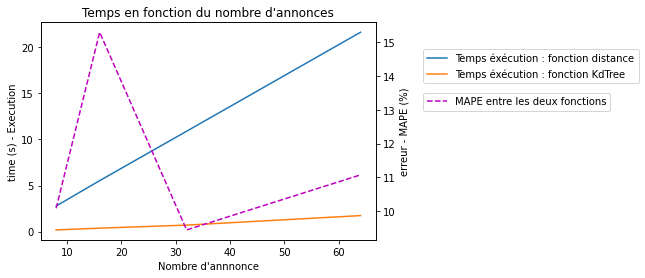

In [238]:
axis=np.logspace(3,6,4, base=2)

#plt.figure(figsize=(5,5))
fig, ax1=plt.subplots()
plt.plot(axis,time_d,label='Temps éxécution : fonction distance')
plt.plot(axis,time_g,label='Temps éxécution : fonction KdTree')
plt.ylabel('time (s) - Execution')
plt.xlabel("Nombre d'annnonce")
plt.title("Temps en fonction du nombre d'annonces")
plt.legend(bbox_to_anchor=(1.8, 0.9))
ax2=ax1.twinx()
plt.plot(axis,error_l,'m--',label='MAPE entre les deux fonctions')
plt.xlabel("Nombre d'annnonces")
plt.ylabel('erreur - MAPE (%)')
#plt.ylim(0, 0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.715, 0.7))
plt.show()

In [264]:
i=7
if i!=None or i>3:
    print('y')
else:
    print('n')
    
i=7
if i!=None:
    print('y')

y
y


In [268]:
l=[1,2,3,0.5]
np.min(l)

0.5

In [269]:
def distance_homemade_coord(lat,long,df_dest):
    res=[]
    for j in df_dest.index:
        #coord2=(df_train.loc[j,'latitude'],df_train.loc[j,'longitude'])
        lat2=df_train.loc[j,'latitude']
        long2=df_train.loc[j,'longitude']
        res.append(distance2(lat,long,lat2,long2))
    return np.min(res)

In [275]:
# Erreur réduite à environ 12% :Test ajout argument pour finir en  distance classique

def KdTree_2(ann_latitude,ann_longitude,df_dest,plus_proche=1,nbleaf_calcul=None):
    
    #Ajout d'une sortie  différente : Si  nbleaf_calcul renseigné  alors on passe  en calcul 
    #de  distance total
    if nbleaf_calcul != None:
        if df_dest.shape[0]<=nbleaf_calcul:
            return distance_homemade_coord(ann_latitude,ann_longitude,df_dest)
    
    if df_dest.shape[0]<=plus_proche: #possible qu'en divisant par 2 on en ait moins
        if  plus_proche==1 :
            dest_latitude=df_dest['latitude'].values[0]
            dest_longitude=df_dest['longitude'].values[0]
            return distance2(ann_latitude,ann_longitude,dest_latitude,dest_longitude)
        else:
            l=[]
            for i in df_dest.index:
                l.append(distance2(ann_latitude,ann_longitude,\
                                  df_dest.loc[i,'latitude'],df_dest.loc[i,'longitude']))
            return l

    med_latitude=df_dest.median()['latitude']
    med_longitude=df_dest.median()['longitude']

    #On calcule  la distance de l'annonce aux séparations longitude & latitude
    d_lat=distance2(ann_latitude,ann_longitude,med_latitude,ann_longitude)
    d_long=distance2(ann_latitude,ann_longitude,ann_latitude,med_longitude)

    #On sépare avec le plan le plus  loin (en fonctiond de  la  hauteur)
    if  d_lat>d_long: #Separation  latitude
        df_g1=df_dest[df_dest['latitude']>med_latitude]
        df_g2=df_dest[df_dest['latitude']<=med_latitude]
#        d_g1=distance2(ann_latitude,ann_longitude,df_g1.mean()['latitude'],df_g1.mean()['longitude'])
#        d_g2=distance2(ann_latitude,ann_longitude,df_g2.mean()['latitude'],df_g2.mean()['longitude'])

        if ann_latitude>med_latitude:
            return  KdTree_2(ann_latitude,ann_longitude,df_g1,plus_proche,nbleaf_calcul)
        else:
            return  KdTree_2(ann_latitude,ann_longitude,df_g2,plus_proche,nbleaf_calcul)
    else: #Separation  longitude
        df_g1=df_dest[df_dest['longitude']>med_longitude]
        df_g2=df_dest[df_dest['longitude']<=med_longitude]
        #d_g1=distance2(ann_latitude,ann_longitude,df_g1.mean()['latitude'],df_g1.mean()['longitude'])
        #d_g2=distance2(ann_latitude,ann_longitude,df_g2.mean()['latitude'],df_g2.mean()['longitude'])
        if ann_longitude>med_longitude:
            return  KdTree_2(ann_latitude,ann_longitude,df_g1,plus_proche,nbleaf_calcul)
        else:
            return  KdTree_2(ann_latitude,ann_longitude,df_g2,plus_proche,nbleaf_calcul)

        
def distance_KDTree2(df_orig,df_dest,plus_proche=1,nbleaf_calcul=None):
    res=pd.DataFrame(index=df_orig.index,columns=range(plus_proche))
    start=time.time()
    for i in res.index:
        #coord1=(df_orig.loc[i,'latitude'],df_orig.loc[i,'longitude']) 
        ann_latitude=df_orig.loc[i,'latitude']
        ann_longitude=df_orig.loc[i,'longitude']
        res.loc[i,:]=KdTree_2(ann_latitude,ann_longitude,df_dest,plus_proche,nbleaf_calcul)
    return [res,time.time()-start]

In [276]:
nbleaf_calcul=100 # Si il reste  uniquement 100 destinations on calcul classiquement

max_gare=df_train.shape[0]
df_dest=df_train[:max_gare]
time_d=[]
time_g=[]
error_l=[]
axis=np.logspace(3,6,4, base=2)
for i in axis:
    print("Nombre d'annonces :{}".format(int(i)))
    df_orig=data[:int(i)]
    res_dist=distance_homemade(df_orig,df_dest)
    res_KDT=distance_KDTree2(df_orig,df_dest,1,nbleaf_calcul)
    time_d.append(res_dist[2])
    time_g.append(res_KDT[1])
    error_l.append(mean_absolute_percentage_error(res_dist[1],res_KDT[0])*100)

Nombre d'annonces :8
Nombre d'annonces :16
Nombre d'annonces :32
Nombre d'annonces :64


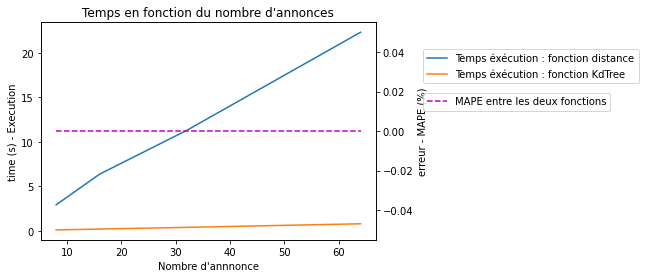

In [277]:
axis=np.logspace(3,6,4, base=2)

#plt.figure(figsize=(5,5))
fig, ax1=plt.subplots()
plt.plot(axis,time_d,label='Temps éxécution : fonction distance')
plt.plot(axis,time_g,label='Temps éxécution : fonction KdTree')
plt.ylabel('time (s) - Execution')
plt.xlabel("Nombre d'annnonce")
plt.title("Temps en fonction du nombre d'annonces")
plt.legend(bbox_to_anchor=(1.8, 0.9))
ax2=ax1.twinx()
plt.plot(axis,error_l,'m--',label='MAPE entre les deux fonctions')
plt.xlabel("Nombre d'annnonces")
plt.ylabel('erreur - MAPE (%)')
#plt.ylim(0, 0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.715, 0.7))
plt.show()

### Gain de temps très bon + Erreur relativement  faible
Ok  c'est validé - Passons à  la parallelisation